<a href="https://colab.research.google.com/github/Mjcherono/TrialProjects/blob/main/Decision_Tree_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examples

We will carry on working with the [Absenteism at work](https://docs.google.com/spreadsheets/d/1KUwbcurAlA7Y7pQAjtzCBCdiYomDMiBxhqkuUfIDXxI/edit?usp=sharing). Make sure to upload it to your notebook. This time however, we will aproach it through regression - trying to predict some of the continuous variables within the set.


For this first task of regression, we will see if we can predict hit target of an employee, based on their attendance record.

In [5]:
import numpy as np
import pandas as pd

#load the data
data = pd.read_excel('/content/Absenteeism_at_work.xlsx')

#displaying the dataset
data.describe()


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


Let's select a few independent variables to use. We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few. Feel free to change which variables are picked and experiment with the model. 

In [6]:
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
y = data['Hit target'].values
data.columns

test_features = ['Service time', 'Age', 'Work load Average/day']
X = data[test_features].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



Let's finally create our model. This time we use DecisionTreeRegressor() instead of the classifier.

We can assess our performance in the same way we have in past regression models. We can quickly describe our predictions VS the actual data

In [10]:
# Create a decision tree classifier

tree = DecisionTreeRegressor()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()



,Actual,Predicted
count,222.000000,222.000000
mean,94.378378,94.378378
std,3.767098,3.767098
min,81.000000,81.000000
25%,92.000000,92.000000
50%,95.000000,95.000000
75%,97.000000,97.000000
max,100.000000,100.000000


That looks extremely close. What do our metrics say?

In [11]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


No error whatsoever! While this might give us cause to celebrate, we should be cautious: This is probably indicative of an overfitted model - one that is too specific to our dataset. Let's try and balance things out by adding a maximum depth to the tree, and a minimum split size. Let's try training a new model

In [15]:
# Create a decision tree classifier

updated_tree = DecisionTreeRegressor(min_samples_split = 20, max_depth=5)

# Train it on our training set.
updated_tree = updated_tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = updated_tree.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()



,Actual,Predicted
count,222.000000,222.000000
mean,94.378378,94.527677
std,3.767098,2.915552
min,81.000000,81.000000
25%,92.000000,93.000000
50%,95.000000,94.407407
75%,97.000000,96.345455
max,100.000000,99.000000


In [13]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 1.5459389313555973
Mean Squared Error: 5.183011363824752
Root Mean Squared Error: 2.276622797879515


This remains a very performant model, but is less accurate that our uncapped one. However, this is likely to be more applicable to other data points outside our dataset. Our RMSE remains very low (Hit rate is a percentage that spans a range of about ~20. An RMSE of 2 is fairly appropriate)

Let's visualize our new updated tree

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


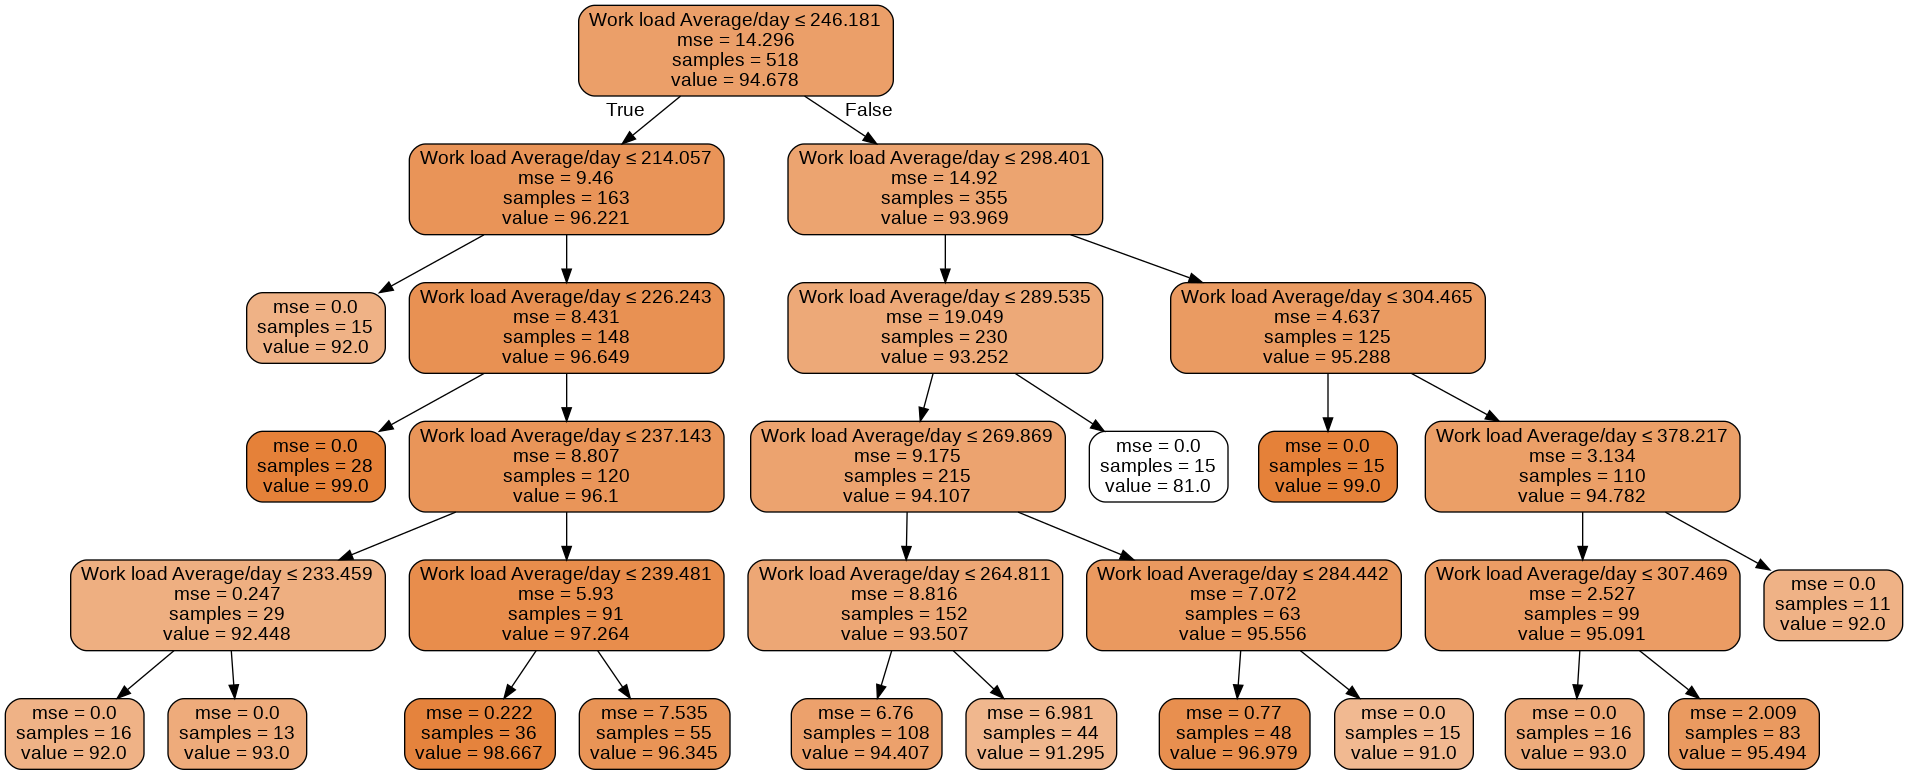

In [14]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(updated_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism.png')
Image(graph.create_png())


Let's try and make some sense of this graph, starting from the **root node**

The first test we perform is based on work load average. In fact, all tests seem to be based on that feature! This is already quite telling, as this suggests that the other features we've included have little bearing on hit rate

Notice as well that we no longer see a ***gini*** value in the nodes - that is specific to classifiers. Instead, each node has an ***mse***, which you should recall to be the mean squared error. It is this mse score that the algorithm tries to minimize whenever it selects a feature for a new node. 
Time for some practice problems


# Challenge 1

As we have seen above, the work load average had a very high influence on predicting hit rate. Train a new model which uses all the features of the dataset **except** work load average.

Assess the accuracy of your model, and visualize the decision tree you've created. What conclusions can you draw?

In [ ]:
# Your code goes here, the dataset should already loaded at this point!

data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [25]:
data['Day of the week'].nunique()

5

In [26]:
y = data['Day of the week'].values

new_test_features = ['Reason for absence','Month of absence','Day of the week','Transportation expense','Distance from Residence to Work','Service time','Age',
                     'Hit target','Disciplinary failure','Education','Son','Social drinker','Social smoker','Pet',
                     'Weight','Height','Body mass index','Absenteeism time in hours']
                    
X = data[new_test_features].values

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.2, random_state=0)

In [31]:
# Create a decision tree regression

updated_tree = DecisionTreeRegressor(min_samples_split = 50, max_depth=8)

# Train it on our training set.
updated_tree = updated_tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = updated_tree.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()


,Actual,Predicted
count,148.000000,148.000000
mean,4.060811,4.060811
std,1.439134,1.439134
min,2.000000,2.000000
25%,3.000000,3.000000
50%,4.000000,4.000000
75%,5.000000,5.000000
max,6.000000,6.000000


In [32]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


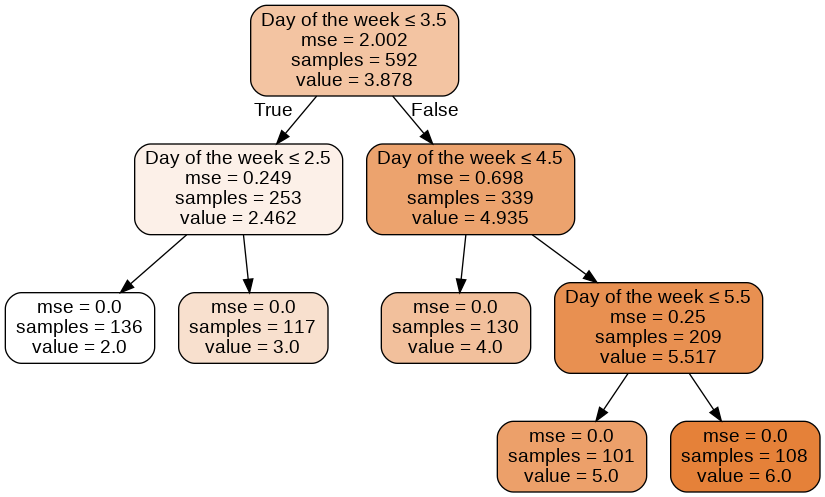

In [33]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(updated_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = new_test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('day_of_the_week.png')
Image(graph.create_png())


# Challenge 2

Consider the following [dataset](https://drive.google.com/open?id=1ZY1syF1NGZFoJjtVrpDFyad-xSR1T_y5rjG5OulPa_I) which contains information about airbnb rentals in NYC. This includes the room time, neighborhood, price, etc. 
You can find more context on it [here](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/downloads/new-york-city-airbnb-open-data.zip/3)

Your task is to create a model which predicts the price charged by an air bnb given information such as reviews, neighborhood, room type, etc.

This is a large dataset, so make sure to contain the growth of your tree, use appropriate min_samples_split and max_depth values, iterating until you find a balance between training time and the quality of the model 

Answer the following questions with a peer:

*   Any crucial insight from your initial EDA?
*   How accurate is your model? Any concerns of overfitting or underfitting?
*   What features are most influential in determining pricing? does that make intuitive sense to you?



In [ ]:
# Your code goes here